In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import datetime
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
import matplotlib.pyplot as plt

In [3]:
# Creating the data again
data = {
    'Sample': ['S1', 'S2', 'S3', 'S4', 'S5'],
    #'Moisture': [25.39, 30.88, 27.57, 28.62, 30.51],
    #'Oil Content': [36.24, 28.73, 33.96, 31.46, 29.08],
    'Viscosity': [52.6, 40.4, 49.4, 45.4, 43.1],
    'C16:0': [3.02, 4.95, 4.07, 1.63, 3.66],
    'C18:0': [1.39, 2.13, 1.31, 3.71, 1.85],
    'C18:1': [61.46, 22.89, 52.72, 44.34, 35.85],
    'C18:2': [23.42, 65.47, 33.24, 42.19, 50.43],
    'C18:3': [7.67, 1.12, 5.05, 4.1, 3.05]
}

# Create DataFrame
df = pd.DataFrame(data)
# Remove the Sample column for analysis
features = df.drop('Sample', axis=1)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])],
                            index=df['Sample'])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

principal_df, explained_variance

(             PC1       PC2       PC3       PC4           PC5
 Sample                                                      
 S1     -2.985399 -0.458826  0.053250 -0.194147  5.395801e-17
 S2      3.129166 -0.724985 -0.169184 -0.131248  5.395801e-17
 S3     -1.205447 -1.082277 -0.197268  0.215381  5.395801e-17
 S4     -0.054895  2.506310 -0.086103  0.027416  5.395801e-17
 S5      1.116575 -0.240222  0.399305  0.082598  5.395801e-17,
 array([7.13571458e-01, 2.74891399e-01, 7.90773650e-03, 3.62940633e-03,
        4.85244461e-34]))

In [4]:
def print_pca_results(principal_df, explained_variance):
    # Print the header for PCA results
    print("===========================\n主成分分析（PCA）的结果如下：\n")
    print("主成分得分（样本的坐标）：\n")
    
    # Loop through the samples and print their scores
    for sample in principal_df.index:
        scores = ", ".join([f"PC{i+1} = {principal_df.loc[sample, f'PC{i+1}']:.3f}" for i in range(principal_df.shape[1])])
        print(f"{sample}: {scores}")
    
    # Print the explained variance for each principal component
    print("\n解释方差比例：\n")
    for i, variance in enumerate(explained_variance):
        print(f"PC{i+1}: 解释了 {variance * 100:.2f}% 的总方差")

# Example call to the function with current PCA data
print_pca_results(principal_df, explained_variance)


主成分分析（PCA）的结果如下：

主成分得分（样本的坐标）：

S1: PC1 = -2.985, PC2 = -0.459, PC3 = 0.053, PC4 = -0.194, PC5 = 0.000
S2: PC1 = 3.129, PC2 = -0.725, PC3 = -0.169, PC4 = -0.131, PC5 = 0.000
S3: PC1 = -1.205, PC2 = -1.082, PC3 = -0.197, PC4 = 0.215, PC5 = 0.000
S4: PC1 = -0.055, PC2 = 2.506, PC3 = -0.086, PC4 = 0.027, PC5 = 0.000
S5: PC1 = 1.117, PC2 = -0.240, PC3 = 0.399, PC4 = 0.083, PC5 = 0.000

解释方差比例：

PC1: 解释了 71.36% 的总方差
PC2: 解释了 27.49% 的总方差
PC3: 解释了 0.79% 的总方差
PC4: 解释了 0.36% 的总方差
PC5: 解释了 0.00% 的总方差


In [5]:
# Continuing from the existing PCA code, adding the calculation of the relationship of principal components as weighted sums of original variables.

# Getting loadings from PCA
loadings = pca.components_

# Displaying the relationship between principal components and original variables
relationships = []
for i, component in enumerate(loadings):
    terms = [f"{weight:.3f} * {var}" for weight, var in zip(component, features.columns)]
    expression = " + ".join(terms)
    relationships.append(f"PC{i+1} = {expression}")

relationships

['PC1 = -0.477 * Viscosity + 0.234 * C16:0 + 0.150 * C18:0 + -0.482 * C18:1 + 0.482 * C18:2 + -0.480 * C18:3',
 'PC2 = -0.096 * Viscosity + -0.674 * C16:0 + 0.733 * C18:0 + 0.006 * C18:1 + -0.005 * C18:2 + -0.014 * C18:3',
 'PC3 = -0.462 * Viscosity + -0.601 * C16:0 + -0.608 * C18:0 + -0.159 * C18:1 + 0.034 * C18:2 + 0.170 * C18:3',
 'PC4 = -0.148 * Viscosity + -0.103 * C16:0 + -0.135 * C18:0 + 0.409 * C18:1 + -0.419 * C18:2 + -0.779 * C18:3',
 'PC5 = -0.017 * Viscosity + 0.081 * C16:0 + 0.073 * C18:0 + -0.673 * C18:1 + -0.731 * C18:2 + 0.020 * C18:3']

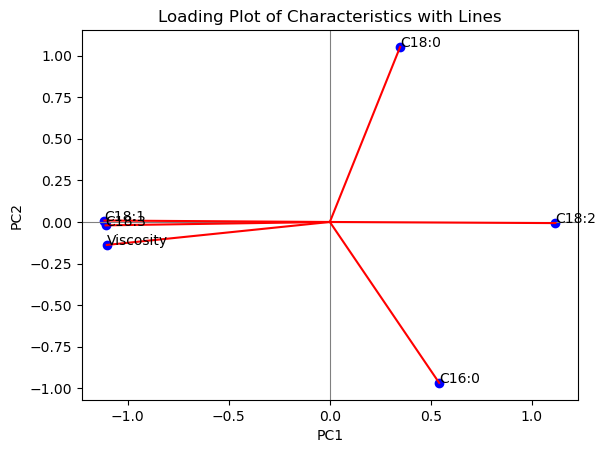

In [6]:


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Recreating the loading plot with lines from the origin to each point
fig, ax = plt.subplots()
ax.scatter(loadings[:, 0], loadings[:, 1], color='blue')
ax.axhline(0, color='grey', linewidth=0.8)
ax.axvline(0, color='grey', linewidth=0.8)

# Adding lines from the origin to each loading point
for i in range(len(loadings)):
    ax.plot([0, loadings[i, 0]], [0, loadings[i, 1]], 'r-')

# Annotating each point with the corresponding variable name
for i, txt in enumerate(features.columns):
    ax.annotate(txt, (loadings[i, 0], loadings[i, 1]))

ax.set_title("Loading Plot of Characteristics with Lines")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Display the plot
plt.show()



file_name = f"PCA_Scores_Plot_A_{current_time}.svg"
fig.savefig(file_name, format='svg')

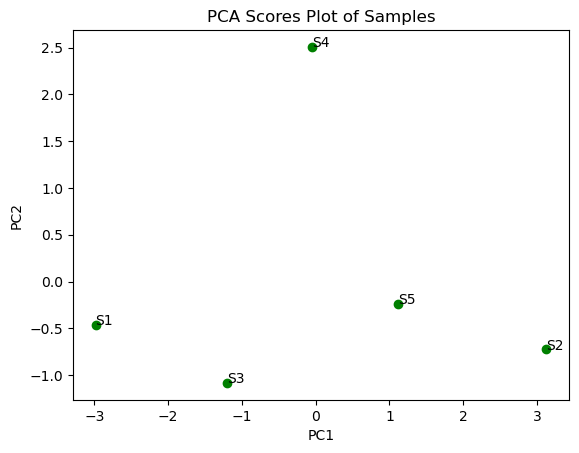

In [7]:
# Creating a scores plot for the different samples
fig, ax = plt.subplots()
ax.scatter(principal_df['PC1'], principal_df['PC2'], color='green', marker='o')

# Annotating each point with the corresponding sample name
for i, txt in enumerate(principal_df.index):
    ax.annotate(txt, (principal_df.iloc[i, 0], principal_df.iloc[i, 1]))

ax.set_title("PCA Scores Plot of Samples")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Display the plot
plt.show()


file_name = f"PCA_Scores_Plot_B_{current_time}.svg"
fig.savefig(file_name, format='svg')